In [1]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=50):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [2]:
urls = search_images("ferrari f40", max_images=1)
urls[0]

/var/folders/h4/qx7nkz751x9gd4p_2j2nsv540000gn/T/ipykernel_32203/119475445.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


'https://www.supercars.net/blog/wp-content/uploads/2016/05/6208758195da668fc545735f83863c7d901e9db.jpg'

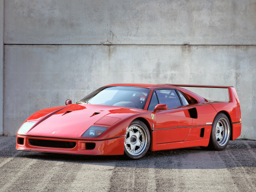

In [3]:
from fastdownload import download_url

dest = 'ferrari f40.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

/var/folders/h4/qx7nkz751x9gd4p_2j2nsv540000gn/T/ipykernel_32203/119475445.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


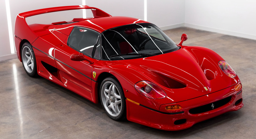

In [4]:
download_url(search_images('ferrari f50', max_images=1)[0], 'ferrari f50.jpg', show_progress=False)
Image.open('ferrari f50.jpg').to_thumb(256,256)

In [5]:
searches = 'f40', 'f50'
from pathlib import Path # Import Path from pathlib
path = Path('ferrari')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'ferrari {o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/var/folders/h4/qx7nkz751x9gd4p_2j2nsv540000gn/T/ipykernel_32203/119475445.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
/var/folders/h4/qx7nkz751x9gd4p_2j2nsv540000gn/T/ipykernel_32203/119475445.py:5: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

/Users/davideferreri/Documents/GitHub/Ferreri_classifier/venv/lib/python3.11/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/davideferreri/Documents/GitHub/Ferreri_classifier/venv/lib/python3.11/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/davideferreri/Documents/GitHub/Ferreri_classifier/venv/lib/python3.11

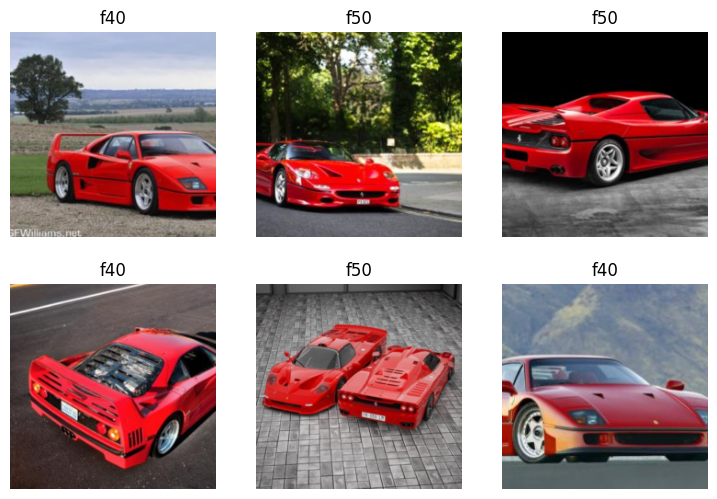

In [7]:
ferrari = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

dls = ferrari.dataloaders(path)

dls.show_batch(max_n=6)

Resize method **Squish**


In [8]:
# ferrari = ferrari.new(item_tfms=Resize(128, ResizeMethod.Squish))
# dls = ferrari.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

Resize method **Padding**


In [9]:
# ferrari = ferrari.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
# dls = ferrari.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

Resize method **Random Resize Crop**


In [10]:
# ferrari = ferrari.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
# dls = ferrari.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

Data Augmentation


In [11]:
# ferrari = ferrari.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = ferrari.dataloaders(path)
# dls.valid.show_batch(max_n=8, nrows=1)

We don't have a lot of data for our problem (50 pictures of each sort of ferrari at most), so to train our model, we'll use RandomResizedCrop with an image size of 224 px, which is fairly standard for image classification, and default aug_transforms:


In [12]:
# ferrari = ferrari.new(
#     item_tfms=RandomResizedCrop(224, min_scale=0.3),
#     batch_tfms=aug_transforms())
# dls = ferrari.dataloaders(path)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.059441,3.489111,0.552632,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.752631,1.677497,0.552632,00:01
1,0.582614,0.527757,0.263158,00:01
2,0.430911,0.127707,0.026316,00:01
3,0.339172,0.048654,0.000000,00:01


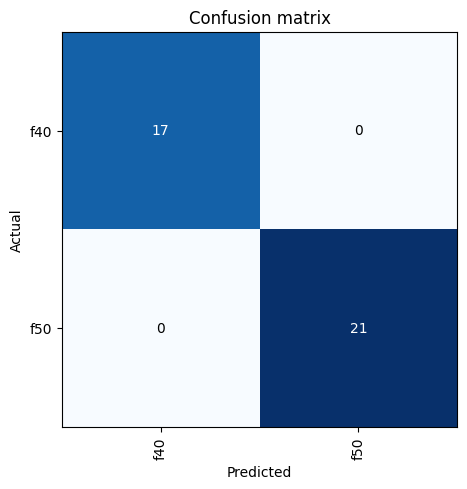

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/Users/davideferreri/Documents/GitHub/Ferreri_classifier/venv/lib/python3.11/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/davideferreri/Documents/GitHub/Ferreri_classifier/venv/lib/python3.11/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
/Users/davideferreri/Documents/GitHub/Ferreri_classifier/venv/lib/python3.11

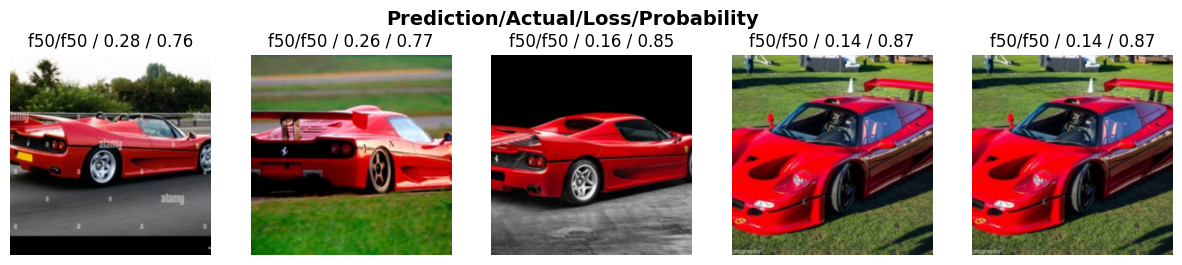

In [15]:
interp.plot_top_losses(5, nrows=1)

In [17]:
is_f40,_,probs = learn.predict(PILImage.create('ferrari f40.jpg'))
print(f"This is a: {is_f40}.")
print(f"Probability it's a f40: {probs[0]:.4f}")

This is a: f40.
Probability it's a f40: 0.9977
